#Pima Indians Onset of Diabetes Deep Learning & Keras

Source: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In this Keras tutorial, we are going to use the Pima Indians onset of diabetes dataset. This is a standard machine learning dataset from the UCI Machine Learning repository. It describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years.

As such, it is a binary classification problem (onset of diabetes as 1 or not as 0). All of the input variables that describe each patient are numerical. This makes it easy to use directly with neural networks that expect numerical input and output values, and ideal for our first neural network in Keras.

Input Variables (X):

Number of times pregnant
Plasma glucose concentration a 2 hours in an oral glucose tolerance test
Diastolic blood pressure (mm Hg)
Triceps skin fold thickness (mm)
2-Hour serum insulin (mu U/ml)
Body mass index (weight in kg/(height in m)^2)
Diabetes pedigree function
Age (years)
Output Variables (y):

Class variable (0 or 1)
Once the CSV file is loaded into memory, we can split the columns of data into input and output variables.

#Importing the Libraries

In [34]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

# Load the Data



In [15]:
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')

# Split the Data into X and y

The data will be stored in a 2D array where the first dimension is rows and the second dimension is columns, e.g. [rows, columns].

We can split the array into two arrays by selecting subsets of columns using the standard NumPy slice operator or “:” We can select the first 8 columns from index 0 to index 7 via the slice 0:8. We can then select the output column (the 9th variable) via index 8.

Note, the dataset has 9 columns and the range 0:8 will select columns from 0 to 7, stopping before index 8. 

In [16]:
X = dataset[:,0:8] #selects all rows and all columns up to index [8] which is column 7.
y = dataset[:,8] #selects all rows and just column 8 (the last one)

# Define the Keras Model

Models in Keras are defined as a sequence of layers.

We create a Sequential model and add layers one at a time until we are happy with our network architecture.

The first thing to get right is to ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument and setting it to 8 for the 8 input variables.

In [45]:
model = Sequential()
model.add(Dense(12, input_dim = 8, activation = 'relu')) #This line defines the input or visible layer AND the first hidden layer
model.add(Dense(8,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid')) 
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None


# Visualize the Model

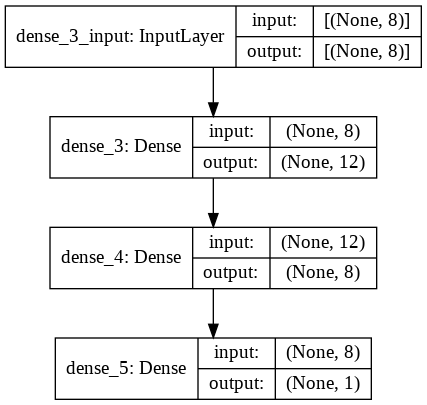

In [35]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#Compile Keras Model

Compiling the model uses the efficient numerical libraries under the covers (the so-called backend) such as Theano or TensorFlow. The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

In [25]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Fit the Keras Model 

We have defined our model and compiled it ready for efficient computation.

Now it is time to execute the model on some data.

We can train or fit our model on our loaded data by calling the fit() function on the model.

Training occurs over epochs and each epoch is split into batches.

Epoch: One pass through all of the rows in the training dataset.
Batch: One or more samples considered by the model within an epoch before weights are updated.

In [29]:
model.fit(X,y, epochs = 150, batch_size = 10, verbose = 1)

Epoch 1/150
77/77 [==============================] - 0s 1ms/step - loss: 0.4930 - accuracy: 0.7773
Epoch 2/150
77/77 [==============================] - 0s 1ms/step - loss: 0.4957 - accuracy: 0.7760
Epoch 3/150
77/77 [==============================] - 0s 1ms/step - loss: 0.4892 - accuracy: 0.7643
Epoch 4/150
77/77 [==============================] - 0s 1ms/step - loss: 0.4884 - accuracy: 0.7747
Epoch 5/150
77/77 [==============================] - 0s 1ms/step - loss: 0.4895 - accuracy: 0.7747
Epoch 6/150
77/77 [==============================] - 0s 996us/step - loss: 0.4835 - accuracy: 0.7747
Epoch 7/150
77/77 [==============================] - 0s 1ms/step - loss: 0.4939 - accuracy: 0.7669
Epoch 8/150
77/77 [==============================] - 0s 991us/step - loss: 0.4876 - accuracy: 0.7682
Epoch 9/150
77/77 [==============================] - 0s 1ms/step - loss: 0.4889 - accuracy: 0.7773
Epoch 10/150
77/77 [==============================] - 0s 977us/step - loss: 0.4990 - accuracy: 0.7643
Epo

# Evaluate Keras Model

We have trained our neural network on the entire dataset and we can evaluate the performance of the network on the same dataset.

This will only give us an idea of how well we have modeled the dataset (e.g. train accuracy), but no idea of how well the algorithm might perform on new data. We have done this for simplicity, but ***ideally, you could separate your data into train and test datasets for training and evaluation of your model.***

You can evaluate your model on your training dataset using the evaluate() function on your model and pass it the same input and output used to train the model.

Ideally, we would like the loss to go to zero and accuracy to go to 1.0 (e.g. 100%). This is not possible for any but the most trivial machine learning problems. Instead, we will always have some error in our model. The goal is to choose a model configuration and training configuration that achieve the lowest loss and highest accuracy possible for a given dataset.

In [30]:
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 975us/step - loss: 0.4409 - accuracy: 0.7969
Accuracy: 79.69


# Make a Single Prediction

After the model is fit, predictions are made for all examples in the dataset, and the input rows and predicted class value for the first 5 examples is printed and compared to the expected class value.

We can see that most rows are correctly predicted. In fact, we would expect about 76.9% of the rows to be correctly predicted based on our estimated performance of the model in the previous section.

In [43]:
predictions = model.predict_classes(X)
# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 1 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 1 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
